In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns',9999)

## EDA

In [2]:
daily_rent_detail=pd.read_csv('data/daily_rent_detail.csv')
station_list=pd.read_csv('data/station_list.csv')
usage_fequency=pd.read_csv("data/usage_frequency.csv")
weather= pd.read_csv('data/weather.csv')

In [3]:
print(f'daily rent detail shape {daily_rent_detail.shape}')
print(f'station list shape {station_list.shape}')
print(f'usage fequency shape {usage_fequency.shape}')
print(f'weather shape {weather.shape}')

daily rent detail shape (16086672, 13)
station list shape (916, 2)
usage fequency shape (873318, 4)
weather shape (1584, 33)


In [4]:
daily_rent_detail.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [5]:
station_list.head()

,station_id,station_name
0,30200,9th St & Pennsylvania Ave NW
1,30201,9th & G St NW
2,31000,Eads St & 15th St S
3,31001,18th St & S Eads St
4,31002,Crystal Dr & 20th St S


In [6]:
usage_fequency.head()

,date,station_name,pickup_counts,dropoff_counts
0,2020-05-01,10th & E St NW,11,7.0
1,2020-05-01,10th & Florida Ave NW,8,8.0
2,2020-05-01,10th & G St NW,3,2.0
3,2020-05-01,10th & K St NW,12,15.0
4,2020-05-01,10th & Monroe St NE,5,6.0


In [7]:
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2020-05-01,18.8,11.6,14.9,18.8,11.6,14.9,8.9,69.6,2.607,100,29.17,rain,0.0,0.0,38.9,25.7,321.2,1008.5,66.7,16.0,111.8,9.5,6,NaN,2020-05-01T06:09:41,2020-05-01T20:01:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
1,"Washington,DC,USA",2020-05-02,22.1,11.1,16.3,22.1,11.1,16.3,6.4,54.0,0.000,0,0.00,NaN,0.0,0.0,39.6,26.1,246.4,1017.3,30.2,15.9,161.8,14.0,9,NaN,2020-05-02T06:08:30,2020-05-02T20:02:13,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KGAI,KADW,K..."
2,"Washington,DC,USA",2020-05-03,24.9,15.6,18.6,24.9,15.6,18.6,13.4,72.5,10.234,100,16.67,rain,0.0,0.0,46.8,21.4,193.9,1010.2,71.7,15.2,67.2,5.7,4,NaN,2020-05-03T06:07:21,2020-05-03T20:03:11,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
3,"Washington,DC,USA",2020-05-04,23.8,14.3,19.2,23.8,14.3,19.2,7.8,53.8,15.555,100,12.50,rain,0.0,0.0,68.8,44.9,317.0,1009.1,50.3,15.2,152.5,13.3,8,NaN,2020-05-04T06:06:12,2020-05-04T20:04:08,0.40,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
4,"Washington,DC,USA",2020-05-05,14.3,9.3,12.3,14.3,8.0,12.1,3.3,55.6,4.488,100,16.67,rain,0.0,0.0,28.4,24.0,350.2,1014.5,81.0,15.2,57.0,5.0,2,NaN,2020-05-05T06:05:06,2020-05-05T20:05:05,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KIAD,KDCA,72405013743,72403793728,72403093738,..."


In [8]:
weather.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [9]:
weather.isna().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          827
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          619
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [10]:
weather_set=weather[
    ['datetime','temp', 'feelslike','precip','snow',
       'windspeed','description', 'icon']
].copy()
weather_set['datetime']=pd.to_datetime(weather_set['datetime'])

In [11]:
usage_fequency.dtypes

date               object
station_name       object
pickup_counts       int64
dropoff_counts    float64
dtype: object

In [12]:
usage_fequency['date']= pd.to_datetime(usage_fequency['date'])

In [13]:
usage_fequency.isna().sum()

date              0
station_name      0
pickup_counts     0
dropoff_counts    0
dtype: int64

In [14]:
data_we_us=pd.merge(usage_fequency,weather_set,right_on='datetime',left_on='date',how='inner')
data_we_us=data_we_us.drop(['date'],axis=1)
data_we_us

,station_name,pickup_counts,dropoff_counts,datetime,temp,feelslike,precip,snow,windspeed,description,icon
0,10th & E St NW,11,7.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
1,10th & Florida Ave NW,8,8.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
2,10th & G St NW,3,2.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
3,10th & K St NW,12,15.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
4,10th & Monroe St NE,5,6.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
...,...,...,...,...,...,...,...,...,...,...,...
873313,Wisconsin Ave & Upton St NW,28,26.0,2024-08-31,24.1,24.4,0.300,0.0,17.2,Cloudy skies throughout the day with rain.,rain
873314,Woodglen Dr & Executive Blvd,4,1.0,2024-08-31,24.1,24.4,0.300,0.0,17.2,Cloudy skies throughout the day with rain.,rain
873315,Woodley Park Metro / Calvert St & Connecticut ...,34,34.0,2024-08-31,24.1,24.4,0.300,0.0,17.2,Cloudy skies throughout the day with rain.,rain
873316,Woodmont Ave & Strathmore St,10,7.0,2024-08-31,24.1,24.4,0.300,0.0,17.2,Cloudy skies throughout the day with rain.,rain


In [15]:
data_we_us.isna().sum()

station_name      0
pickup_counts     0
dropoff_counts    0
datetime          0
temp              0
feelslike         0
precip            0
snow              0
windspeed         0
description       0
icon              0
dtype: int64

In [16]:
daily_rent_detail.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [17]:
daily_rent_detail.shape[0] - daily_rent_detail['ride_id'].nunique()

141

In [18]:
daily_rent_detail.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1450150
start_station_id      1450150
end_station_name      1558268
end_station_id        1558917
start_lat                  10
start_lng                  10
end_lat                 25929
end_lng                 25929
member_casual               0
dtype: int64

In [19]:
daily_rent_detail['started_at'] = pd.to_datetime(daily_rent_detail['started_at'], format='mixed')
daily_rent_detail['ended_at'] = pd.to_datetime(daily_rent_detail['ended_at'], format='mixed')

invalid_dates = daily_rent_detail[daily_rent_detail['started_at'].isna()]
invalid_dates.shape


(0, 13)

In [20]:
daily_rent_detail.sample(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
13982193,09E33B04937BFDFB,classic_bike,2024-05-12 09:45:49,2024-05-12 10:00:03,S Scott St & 13th St S,31949.0,S Four Mile Run Dr & Shirlington Rd,31057.0,38.862862,-77.077160,38.844400,-77.085931,member
8443324,360E6CDB0E1E775E,classic_bike,2023-03-12 19:15:52,2023-03-12 19:24:09,17th & K St NW,31213.0,14th & R St NW,31202.0,38.902760,-77.038630,38.913046,-77.032008,member
11485892,4C7D7531F917F3F7,classic_bike,2023-10-31 17:17:57,2023-10-31 17:24:12,Braddock Rd Metro South,31969.0,Powhatan St & Bashford Ln,31915.0,38.813474,-77.053734,38.818748,-77.047783,casual
13165083,ACF5D157282BE80A,electric_bike,2024-03-17 15:40:36,2024-03-17 16:24:16,NaN,NaN,13th St & New York Ave NW,31227.0,38.890000,-77.040000,38.900283,-77.029822,member
11063745,3AE6E2F66BDC01A0,classic_bike,2023-09-06 18:19:52,2023-09-06 18:32:55,1st & M St NE,31603.0,1st & Rhode Island Ave NW,31506.0,38.905697,-77.005483,38.915417,-77.012289,casual
566450,7F41452991A7A5CB,docked_bike,2020-07-10 22:40:43,2020-07-10 23:05:31,Prince St & Union St,31041.0,Potomac Ave & Swann Ave,31916.0,38.803124,-77.040363,38.829545,-77.047844,casual


In [21]:
daily_rent_detail.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1450150
start_station_id      1450150
end_station_name      1558268
end_station_id        1558917
start_lat                  10
start_lng                  10
end_lat                 25929
end_lng                 25929
member_casual               0
dtype: int64

In [22]:
daily_rent_detail=daily_rent_detail.dropna()

In [23]:
data_place=daily_rent_detail.groupby(['start_station_name','start_lat','start_lng']).size().reset_index()
data_place=data_place.drop_duplicates(subset=['start_station_name'])
data_place=data_place[['start_station_name','start_lat','start_lng']]

In [24]:
data_place.head()

,start_station_name,start_lat,start_lng
0,S Scott St & 13th St S,38.862614,-77.077170
139,10th & E St NW,38.863323,-76.953418
5605,10th & Florida Ave NW,38.919469,-77.025118
8552,10th & G St NW,38.895597,-77.056676
12649,10th & H St NE,38.869255,-76.959478


In [25]:
data_place['start_station_name'].nunique()

906

In [26]:
station_list['station_name'].nunique()

912

In [27]:
data=pd.merge(data_we_us,data_place,left_on='station_name',right_on='start_station_name',how='left')
data.head(3)

,station_name,pickup_counts,dropoff_counts,datetime,temp,feelslike,precip,snow,windspeed,description,icon,start_station_name,start_lat,start_lng
0,10th & E St NW,11,7.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain,10th & E St NW,38.863323,-76.953418
1,10th & Florida Ave NW,8,8.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain,10th & Florida Ave NW,38.919469,-77.025118
2,10th & G St NW,3,2.0,2020-05-01,14.9,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain,10th & G St NW,38.895597,-77.056676


In [28]:
data[data.duplicated()]

,station_name,pickup_counts,dropoff_counts,datetime,temp,feelslike,precip,snow,windspeed,description,icon,start_station_name,start_lat,start_lng


In [29]:
data=data.dropna()

In [30]:
data.isna().sum()

station_name          0
pickup_counts         0
dropoff_counts        0
datetime              0
temp                  0
feelslike             0
precip                0
snow                  0
windspeed             0
description           0
icon                  0
start_station_name    0
start_lat             0
start_lng             0
dtype: int64

In [31]:
data=data[['datetime','pickup_counts','dropoff_counts','station_name','start_lat',
 'start_lng','temp', 'precip', 'snow', 'windspeed', 'description', 'icon']]
data.head()

,datetime,pickup_counts,dropoff_counts,station_name,start_lat,start_lng,temp,precip,snow,windspeed,description,icon
0,2020-05-01,11,7.0,10th & E St NW,38.863323,-76.953418,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
1,2020-05-01,8,8.0,10th & Florida Ave NW,38.919469,-77.025118,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
2,2020-05-01,3,2.0,10th & G St NW,38.895597,-77.056676,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
3,2020-05-01,12,15.0,10th & K St NW,38.869472,-76.978546,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
4,2020-05-01,5,6.0,10th & Monroe St NE,38.809623,-77.129001,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain


In [32]:
# raname columns
data=data.rename(
    columns={
        'start_lat':'station_latitude',
        'start_lng':'station_longitude'
    }
)
data.columns


Index(['datetime', 'pickup_counts', 'dropoff_counts', 'station_name',
       'station_latitude', 'station_longitude', 'temp', 'precip', 'snow',
       'windspeed', 'description', 'icon'],
      dtype='object')

In [33]:
data.head()

,datetime,pickup_counts,dropoff_counts,station_name,station_latitude,station_longitude,temp,precip,snow,windspeed,description,icon
0,2020-05-01,11,7.0,10th & E St NW,38.863323,-76.953418,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
1,2020-05-01,8,8.0,10th & Florida Ave NW,38.919469,-77.025118,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
2,2020-05-01,3,2.0,10th & G St NW,38.895597,-77.056676,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
3,2020-05-01,12,15.0,10th & K St NW,38.869472,-76.978546,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
4,2020-05-01,5,6.0,10th & Monroe St NE,38.809623,-77.129001,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain


In [34]:
data.shape

(873313, 12)

In [35]:
# save data set

import os

path='data/processed/data.csv'

os.makedirs(os.path.dirname(path),exist_ok=True)

data.to_csv(path,index=False)

## Data Visualization

In [36]:
rent_bike_type=daily_rent_detail.groupby(['rideable_type']).agg(
    Frequence=('rideable_type','count')
).reset_index().sort_values(by='Frequence',ascending=False)
rent_bike_type

,rideable_type,Frequence
0,classic_bike,9590501
2,electric_bike,2492957
1,docked_bike,1844759


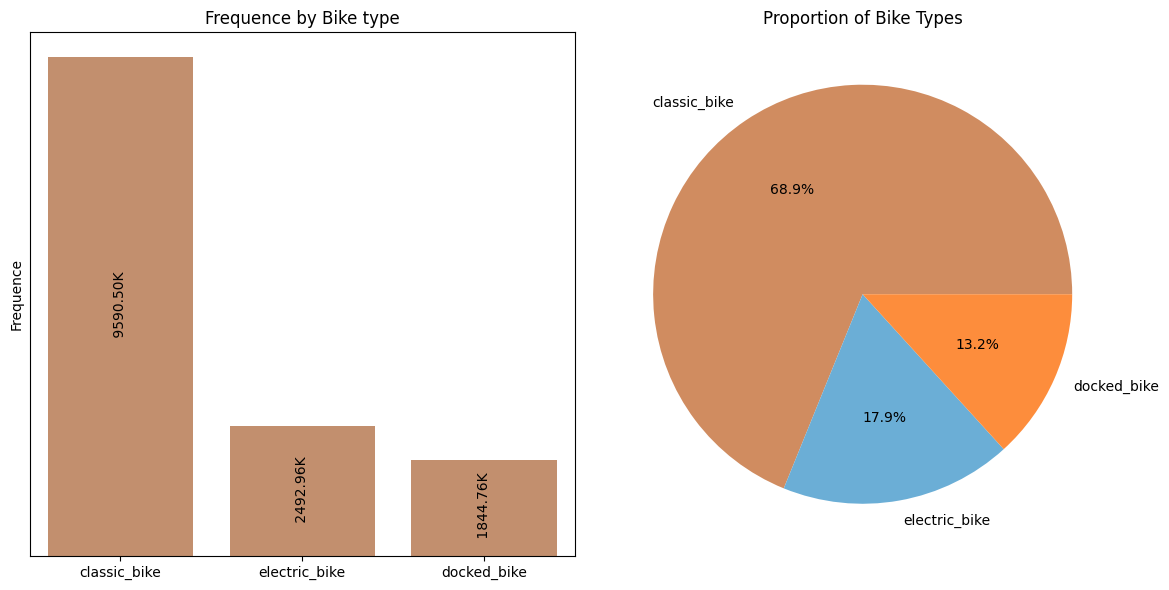

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot on axes[0]
ax = sns.barplot(x='rideable_type', y='Frequence', color='#d08c60', data=rent_bike_type, ax=axes[0])
for container in ax.containers:
    label = [f'{val: .2f}K' for val in container.datavalues / 1000]
    ax.bar_label(container, labels=label, label_type='center', rotation=90, color='black')

axes[0].set_xlabel('')
axes[0].set_ylabel('Frequence')
axes[0].set_title('Frequence by Bike type')
axes[0].set_yticks([])

# Pie chart on axes[1]
axes[1].pie(rent_bike_type['Frequence'], labels=rent_bike_type['rideable_type'], autopct='%1.1f%%', colors=['#d08c60', '#6baed6', '#fd8d3c'])
axes[1].set_title('Proportion of Bike Types')

plt.tight_layout()
plt.show()


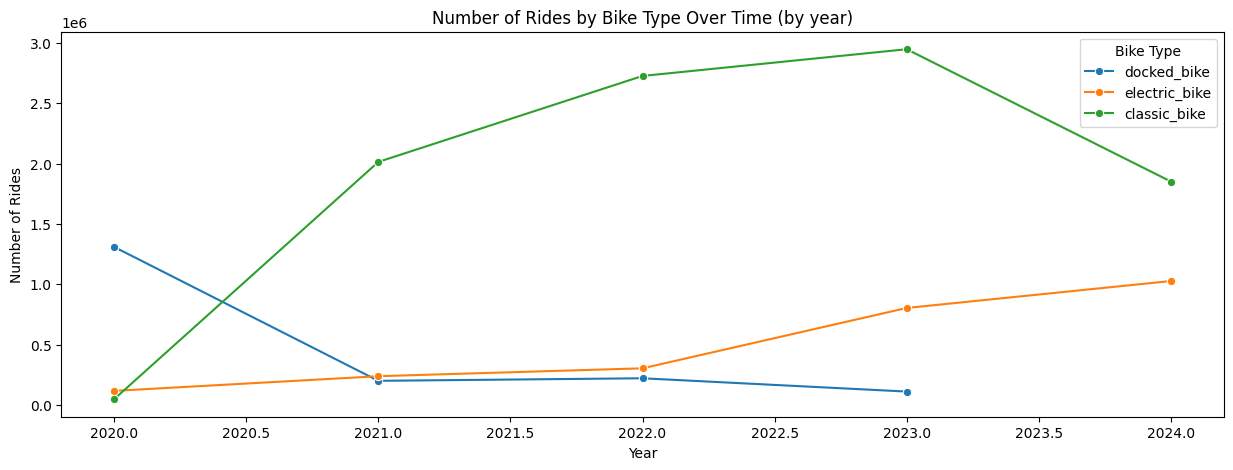

In [38]:
plt.figure(figsize=(15,5))
years= daily_rent_detail['started_at'].dt.year.unique()
bike_type=daily_rent_detail['rideable_type'].unique()

for bike in bike_type:
    df= daily_rent_detail[daily_rent_detail['rideable_type']==bike]
    df_time=df.groupby(df['started_at'].dt.year).size()

    sns.lineplot(x=df_time.index,y=df_time.values,label=bike,marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Bike Type Over Time (by year)')
plt.legend(title="Bike Type")
plt.show()

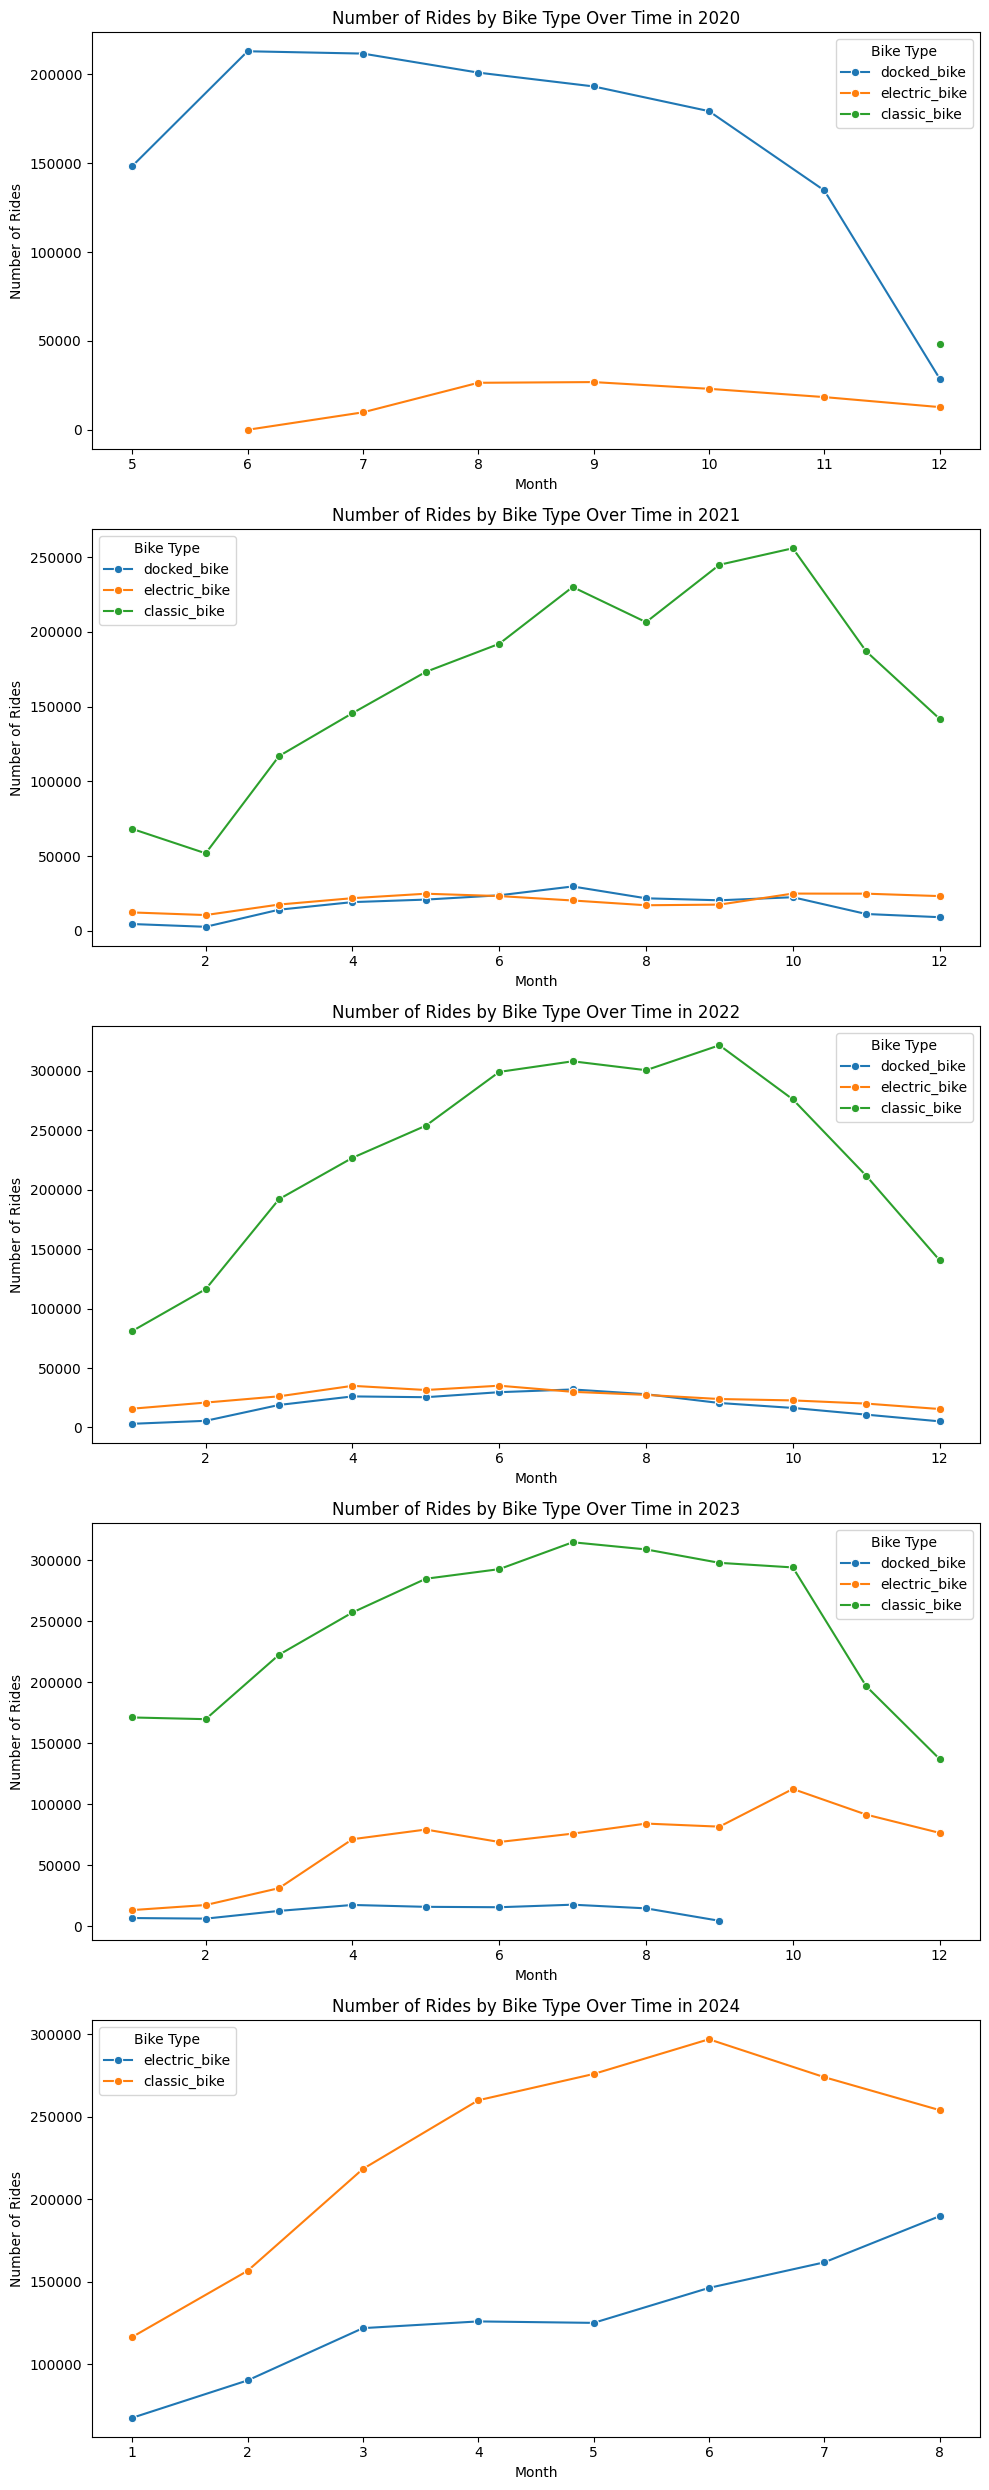

In [39]:
# to see Number of Rides by Bike Type Over Time for each year 


years = daily_rent_detail['started_at'].dt.year.unique()
bike_type = daily_rent_detail['rideable_type'].unique()

fig, axes = plt.subplots(len(years), figsize=(10, 5 * len(years)))


for i, year in enumerate(years):

    year_df = daily_rent_detail[daily_rent_detail['started_at'].dt.year == year]

    for bike in bike_type:
    
        df = year_df[year_df['rideable_type'] == bike]

        df_time = df.groupby(df['started_at'].dt.month).size()

        sns.lineplot(x=df_time.index, y=df_time.values, label=bike, ax=axes[i], marker='o')

    axes[i].set_title(f'Number of Rides by Bike Type Over Time in {int(year)}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Rides')

    axes[i].legend(title="Bike Type")


plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

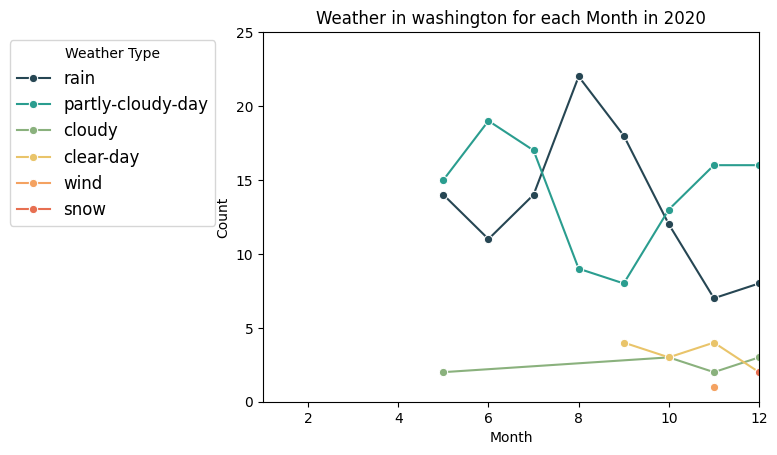

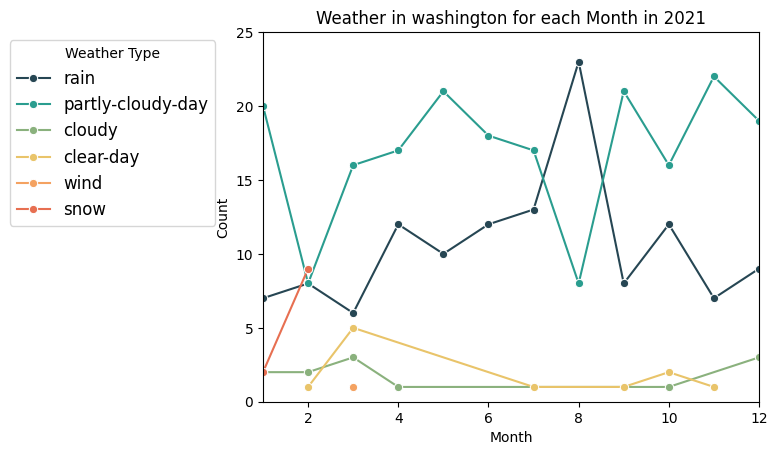

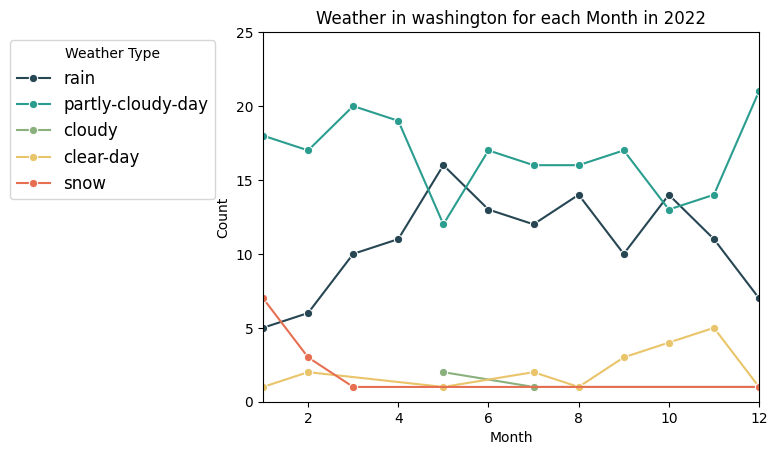

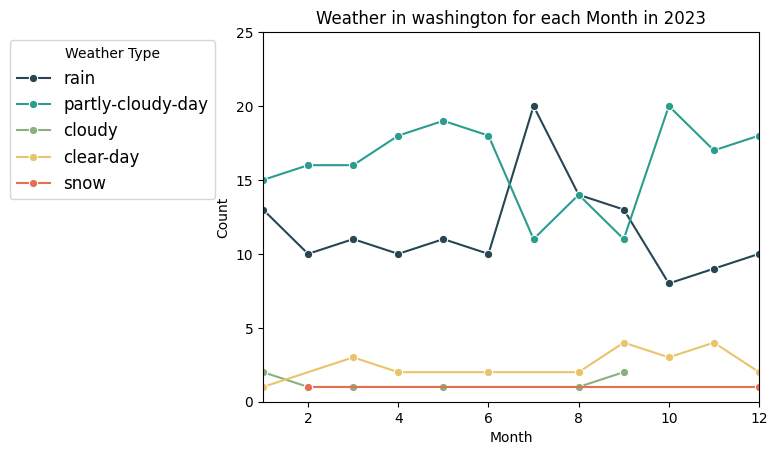

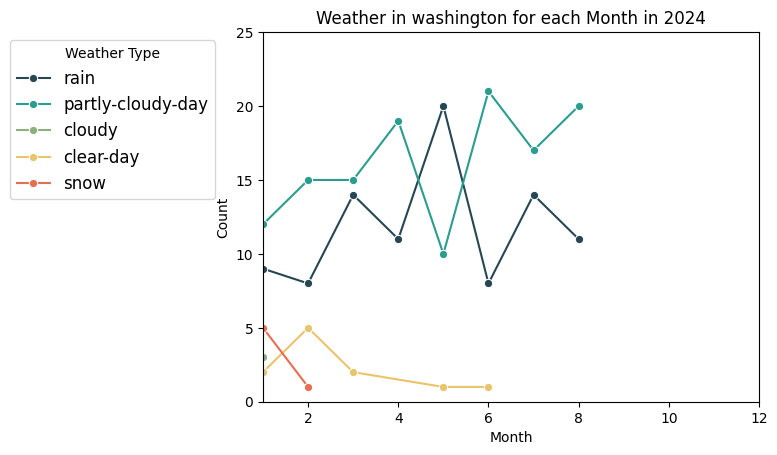

In [40]:
icons = weather_set['icon'].unique()
date_year = weather_set['datetime'].dt.year.unique()
colors={'rain':'#264653',
        'partly-cloudy-day':'#2a9d8f',
        'cloudy':'#8ab17d',
        'clear-day':'#e9c46a',
        'wind':'#f4a261',
        'snow':'#e76f51'}

plt.figure(figsize=(15, 5))

for i, year in enumerate(date_year):
    data_set = weather_set[weather_set['datetime'].dt.year == int(year)]

    fig, ax = plt.subplots()
    
    for icon in icons:

        df = data_set[data_set['icon'] == icon]
    
        df_time = df.groupby(df['datetime'].dt.month).size()
        
        sns.lineplot(x=df_time.index, y=df_time.values, label=icon, marker='o', ax=ax,color=colors[icon])
    
    ax.legend(loc='upper right', bbox_to_anchor=(-0.08, 1),title="Weather Type",fontsize=12)
    ax.set_xlim(1, 12)
    ax.set_ylim(0, 25)
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    plt.title(f'Weather in washington for each Month in {year}')
    plt.show()

In [41]:
data.head()

,datetime,pickup_counts,dropoff_counts,station_name,station_latitude,station_longitude,temp,precip,snow,windspeed,description,icon
0,2020-05-01,11,7.0,10th & E St NW,38.863323,-76.953418,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
1,2020-05-01,8,8.0,10th & Florida Ave NW,38.919469,-77.025118,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
2,2020-05-01,3,2.0,10th & G St NW,38.895597,-77.056676,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
3,2020-05-01,12,15.0,10th & K St NW,38.869472,-76.978546,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain
4,2020-05-01,5,6.0,10th & Monroe St NE,38.809623,-77.129001,14.9,2.607,0.0,25.7,Partly cloudy throughout the day with rain cle...,rain


In [42]:
def scatter_of_item(item,cols,data,color,mean_col):
    fig,axes =plt.subplots(len(cols), figsize=(15, 35))
    for i,col in enumerate(cols):
        mean=data[col].mean()
        sns.set_theme()
        sns.scatterplot(data,x=item,y=col,ax=axes[i],color=color)
        axes[i].set_title(f"{item} by {col}")
        axes[i].set_xlabel(item)
        axes[i].set_ylabel(col)
        axes[i].axhline(mean, color=mean_col, linestyle='--', label='Mean')
        
        axes[i].legend()
    plt.tight_layout()
    plt.show()

columns=['temp','precip','snow','windspeed']


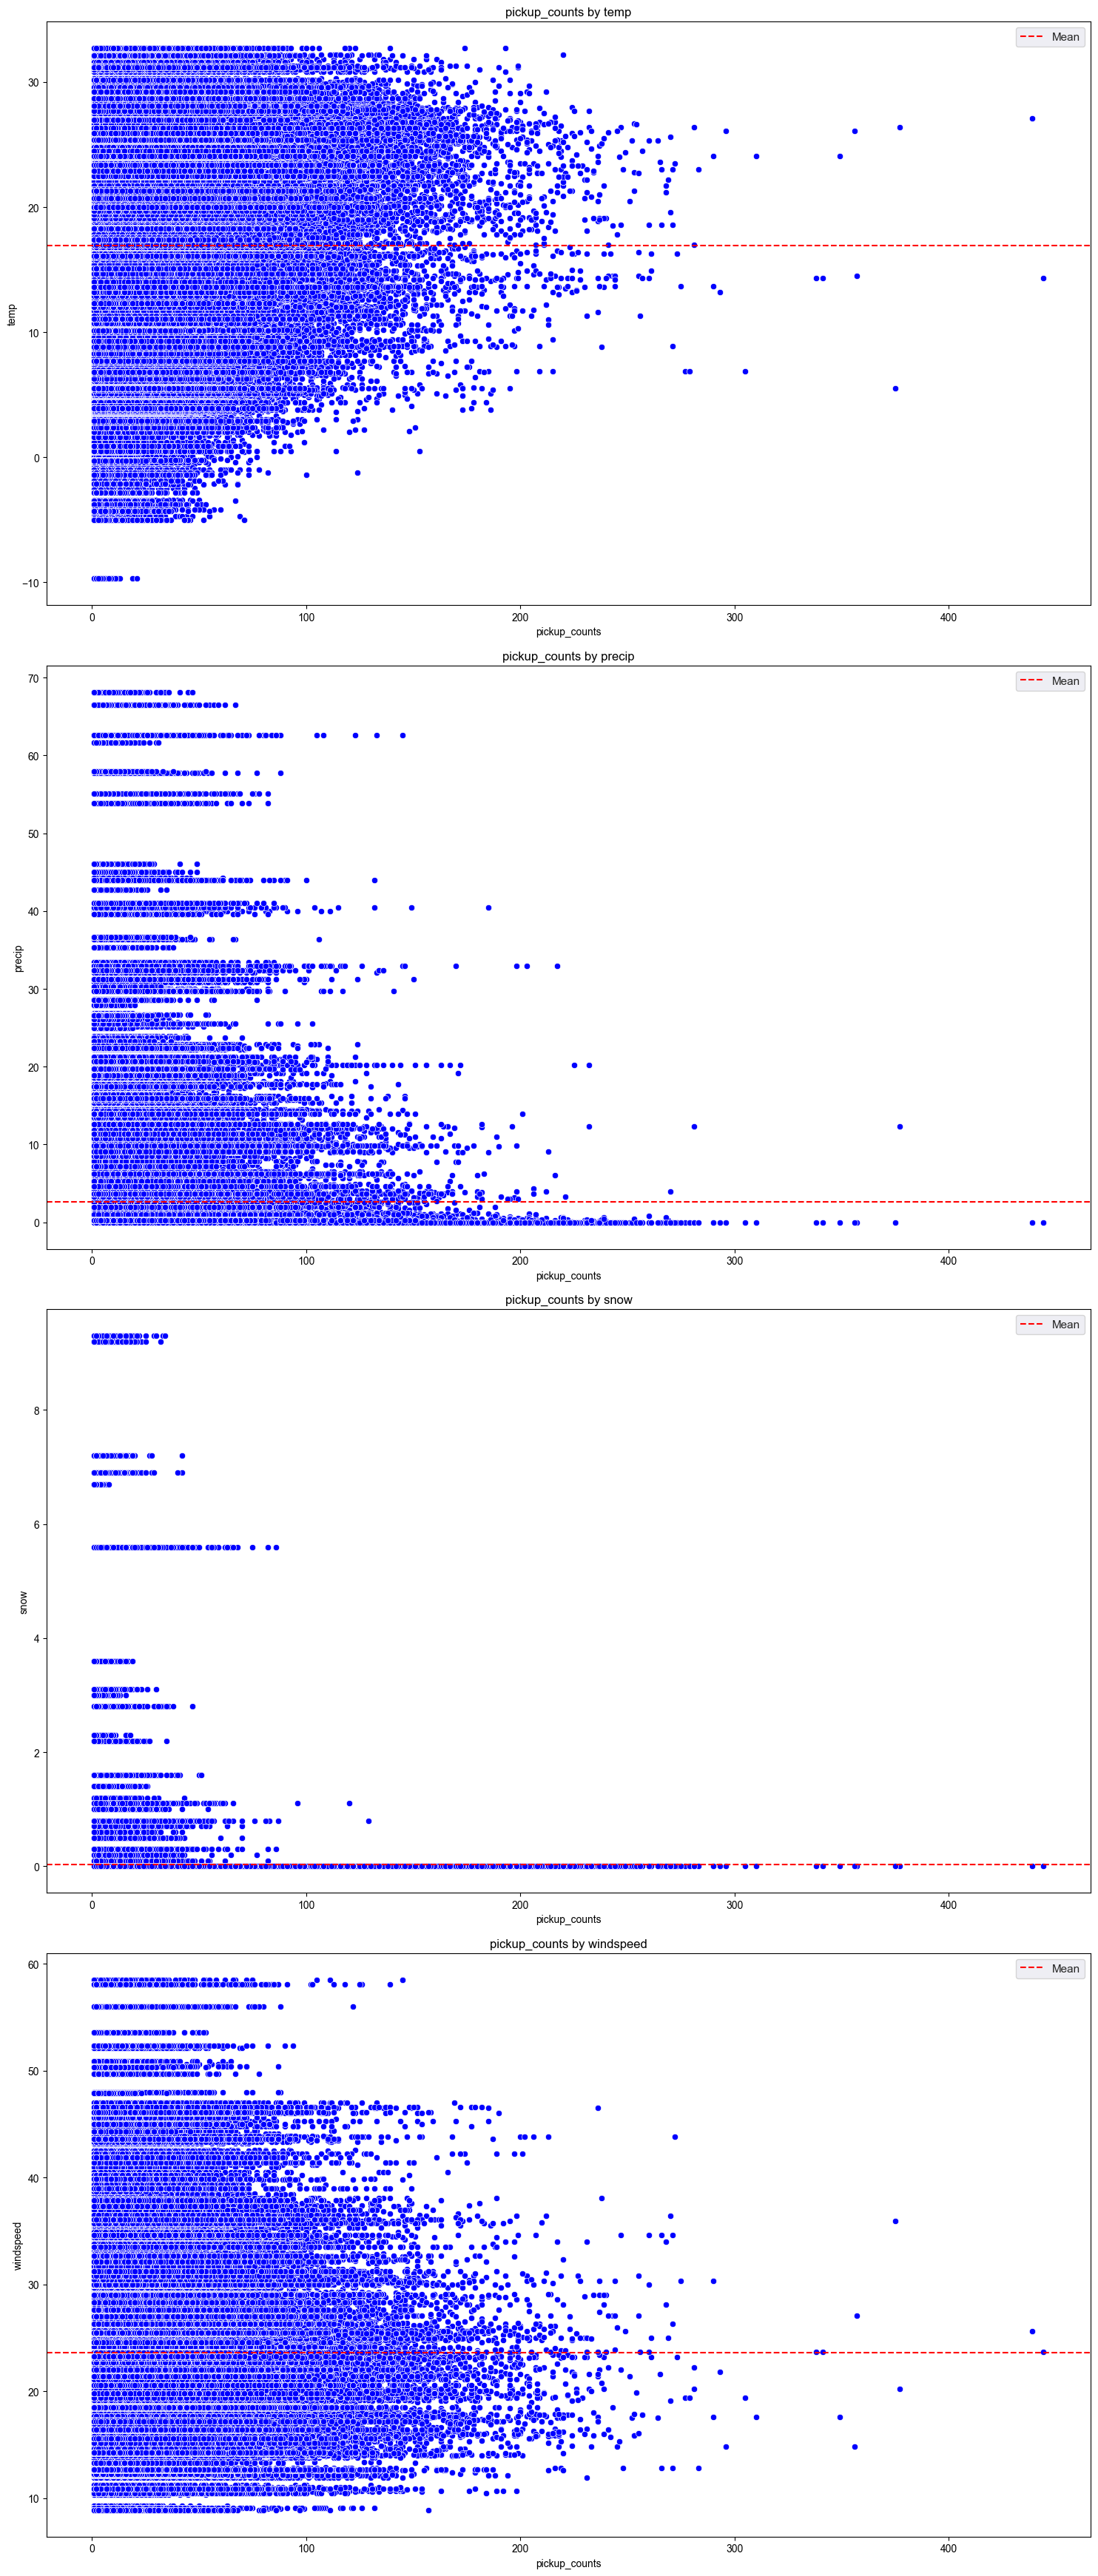

In [43]:
scatter_of_item('pickup_counts',columns,data,'blue','red')

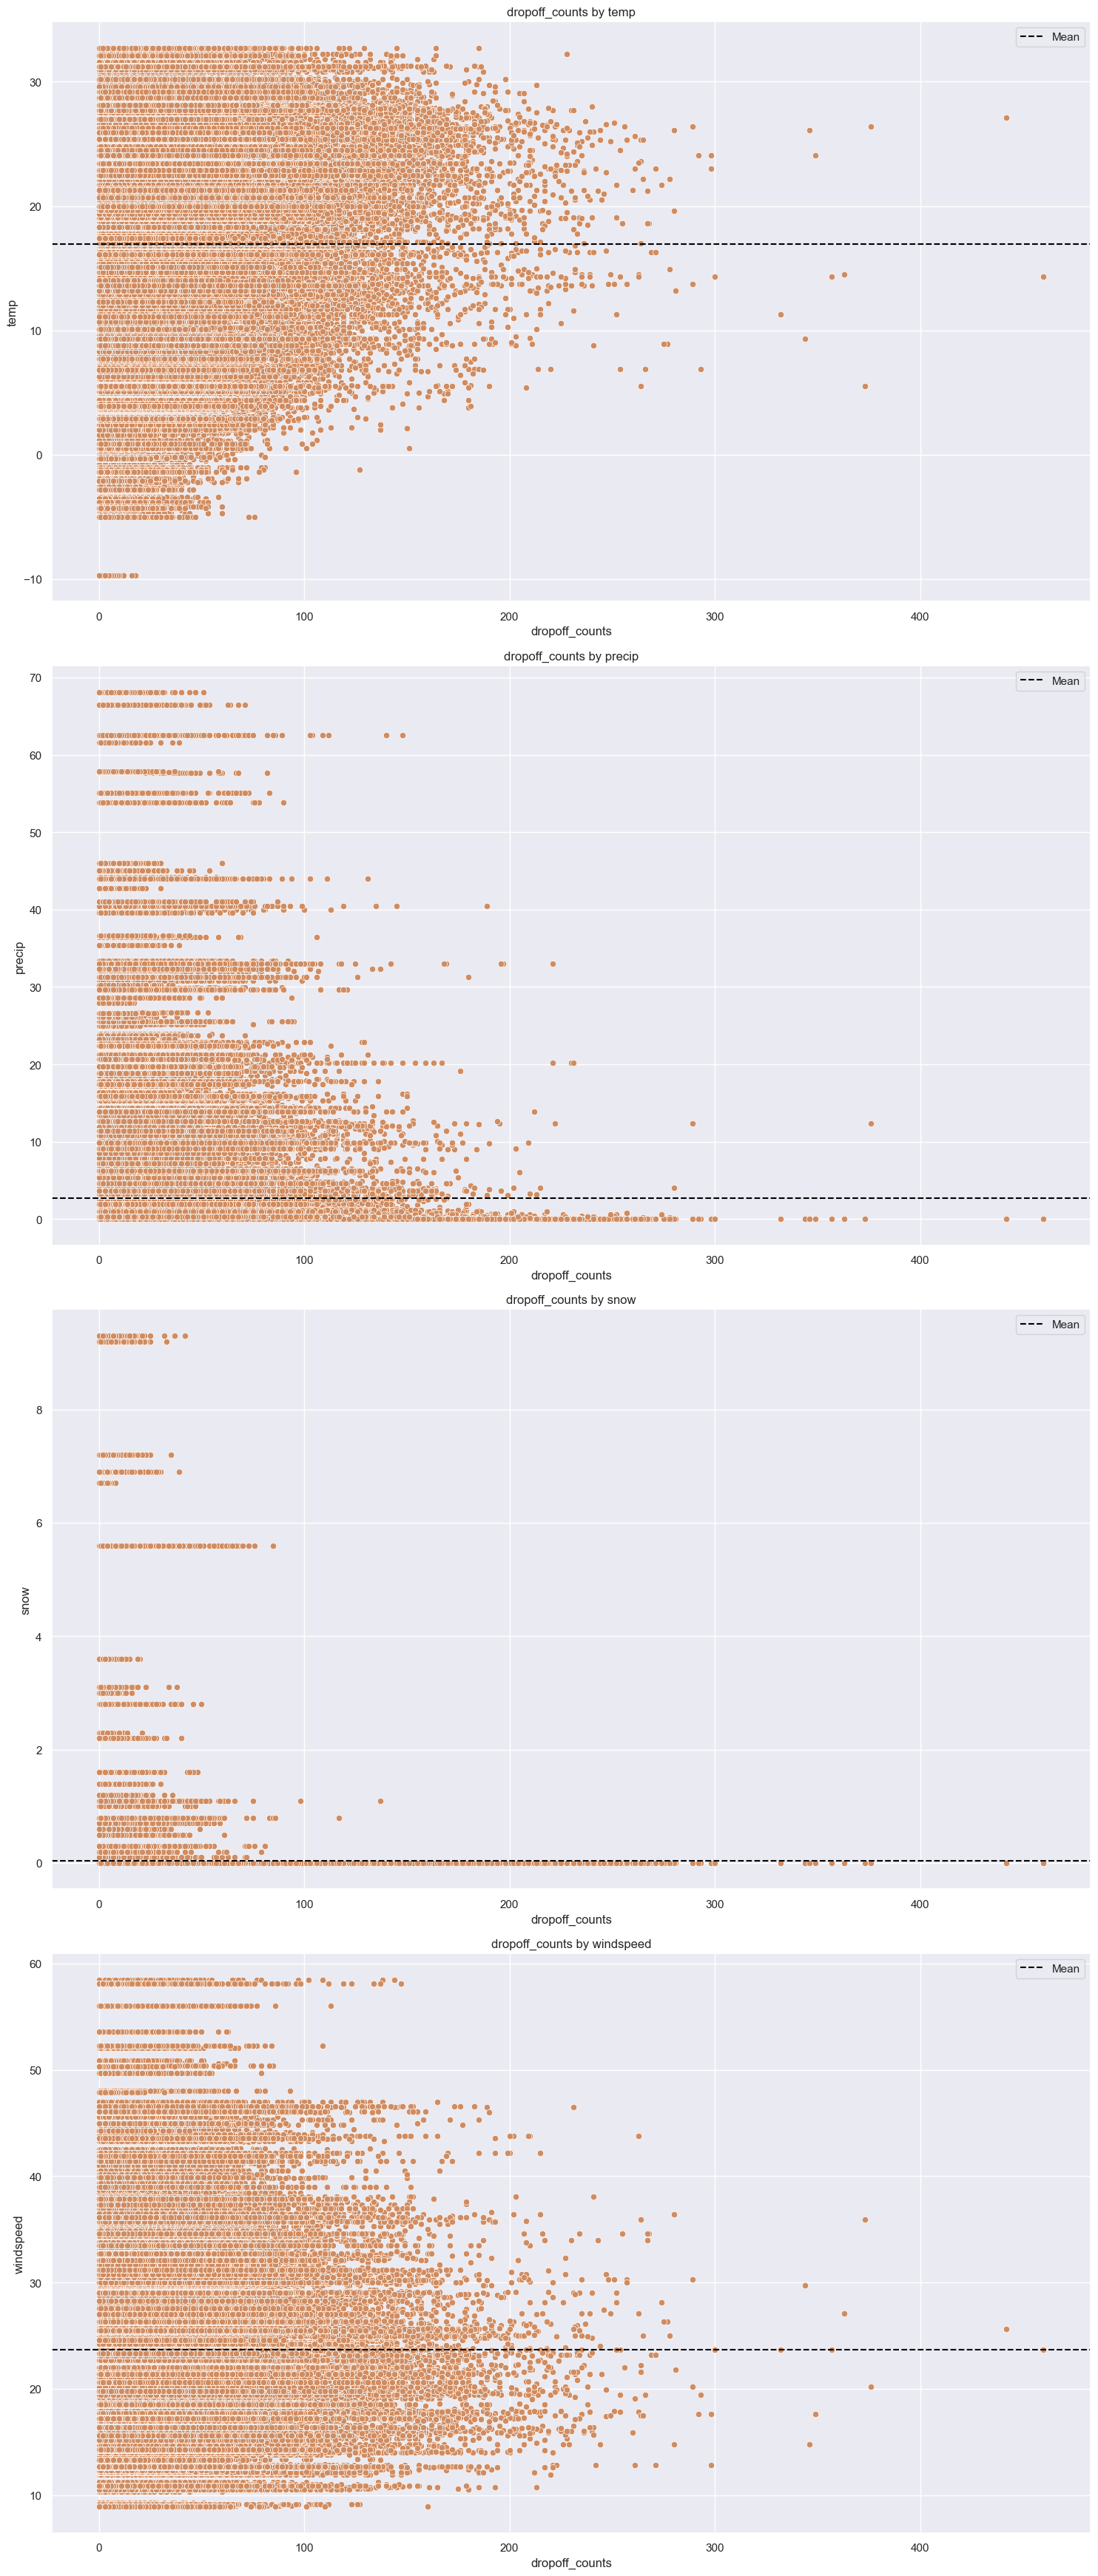

In [44]:
scatter_of_item('dropoff_counts',columns,data,'#d08c60','black')

## Model

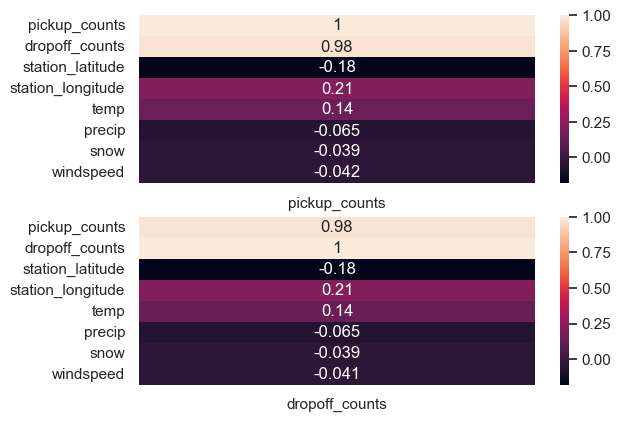

In [45]:
correlation= data.select_dtypes('number').corr()
fig,ax=plt.subplots(2,1)
sns.heatmap(correlation[['pickup_counts']],annot=True,ax=ax[0])
axes=sns.heatmap(correlation[['dropoff_counts']],annot=True,ax=ax[1])

In [61]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression



In [47]:
num_data=data.select_dtypes('number').columns
cat_data=data.select_dtypes('O').columns
print(f'numerical data {num_data}')
print()
print(f'categorical data {cat_data}')

numerical data Index(['pickup_counts', 'dropoff_counts', 'station_latitude',
       'station_longitude', 'temp', 'precip', 'snow', 'windspeed'],
      dtype='object')

categorical data Index(['station_name', 'description', 'icon'], dtype='object')


In [64]:
num_columns=['station_latitude','station_longitude', 'temp', 'precip', 'snow', 'windspeed']
cat_columns=['description']

target=['pickup_counts']

In [66]:
preprocess=ColumnTransformer(
    [
    ('StandardScaler',StandardScaler(),num_columns),
    ('TfidfTransformer',TfidfTransformer(),cat_columns)]
)
X=data[num_columns+cat_columns]
data_model= preprocess.fit_transform(X)


ValueError: could not convert string to float: 'Partly cloudy throughout the day with rain clearing later.'

In [50]:
onehotencoder = preprocess.named_transformers_['TfidfTransformer']
onehot_encoded_columns = onehotencoder.get_feature_names_out(cat_columns)

new_columns = list(num_columns) + list(onehot_encoded_columns)
data_model_set = pd.DataFrame(data_model, columns=new_columns)

data_model_set['pickup_counts']=data['pickup_counts'].values
data_model_set.head()

,station_latitude,station_longitude,temp,precip,snow,windspeed,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind,pickup_counts
0,0.0,0.0,0.0,1.0,0.0,0.0,-0.411224,1.288295,-0.23546,-0.008228,-0.081747,0.269118,11
1,0.0,0.0,0.0,1.0,0.0,0.0,0.660739,0.304193,-0.23546,-0.008228,-0.081747,0.269118,8
2,0.0,0.0,0.0,1.0,0.0,0.0,0.204962,-0.128952,-0.23546,-0.008228,-0.081747,0.269118,3
3,0.0,0.0,0.0,1.0,0.0,0.0,-0.293828,0.943407,-0.23546,-0.008228,-0.081747,0.269118,12
4,0.0,0.0,0.0,1.0,0.0,0.0,-1.436508,-1.121625,-0.23546,-0.008228,-0.081747,0.269118,5


In [51]:
correlation=data_model_set.corr()


<Axes: >

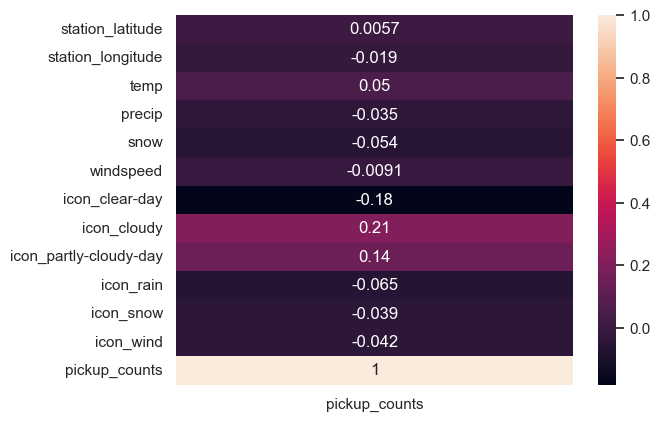

In [52]:
sns.heatmap(correlation[['pickup_counts']],annot=True)

In [53]:
model_columns=['temp',
      'precip', 'snow',
        'icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day','icon_rain', 'icon_snow', 'icon_wind']
X=data_model_set[model_columns]

In [54]:
def evaluate(true,hat):
    mae=mean_absolute_error(true,hat)
    r2=r2_score(true,hat)
    mse=mean_squared_error(true,hat)

    return mae,r2,mse

In [55]:
models={
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(),
    "LinearRegression":LinearRegression(),
    "KNeighborsRegressor":KNeighborsRegressor()
}



In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,data_model_set[target],test_size=0.2,random_state=42)

In [57]:
print(f'x train shape {x_train.shape}')
print(f'x test shape {x_test.shape}')
print(f'y train shape {y_train.shape}')
print(f'y test shape {y_test.shape}')

x train shape (698650, 9)
x test shape (174663, 9)
y train shape (698650, 1)
y test shape (174663, 1)


In [58]:
model_name_list=[]
r2_list=[]
mse_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    model_name_list.append(list(models.keys())[i])
    y_test_predict=model.predict(x_test)

    mae,r2,mse=evaluate(y_test,y_test_predict)

    r2_list.append(r2)
    mse_list.append(mse)

    print('-'*20)

    print(f' Model Performance in Test set {list(models.keys())[i]}')
    print(f' mae in train : {mae:.4f} ')
    print(f' mse in train : {mse:.4f} ')
    print(f' r2 Score in train : {r2:.4f} ')

--------------------
 Model Performance in Test set RandomForestRegressor
 mae in train : 7.9989 
 mse in train : 216.6794 
 r2 Score in train : 0.5509 
--------------------
 Model Performance in Test set DecisionTreeRegressor
 mae in train : 9.4172 
 mse in train : 292.5713 
 r2 Score in train : 0.3937 
--------------------
 Model Performance in Test set XGBRegressor
 mae in train : 7.5790 
 mse in train : 170.4715 
 r2 Score in train : 0.6467 
--------------------
 Model Performance in Test set LinearRegression
 mae in train : 14.3510 
 mse in train : 436.1763 
 r2 Score in train : 0.0961 
--------------------
 Model Performance in Test set KNeighborsRegressor
 mae in train : 11.4090 
 mse in train : 353.6552 
 r2 Score in train : 0.2671 


In [59]:
loss_data= pd.DataFrame(list(zip(model_name_list,mse_list,r2_list)),columns=[['model_name','accuracy','r2_score']])
loss_data

,model_name,accuracy,r2_score
0,RandomForestRegressor,216.679435,0.550948
1,DecisionTreeRegressor,292.571267,0.393668
2,XGBRegressor,170.471473,0.646711
3,LinearRegression,436.176260,0.096058
4,KNeighborsRegressor,353.655217,0.267077


In [60]:
loss_data

,model_name,accuracy,r2_score
0,RandomForestRegressor,216.679435,0.550948
1,DecisionTreeRegressor,292.571267,0.393668
2,XGBRegressor,170.471473,0.646711
3,LinearRegression,436.176260,0.096058
4,KNeighborsRegressor,353.655217,0.267077
